# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Leitura dos dados

In [2]:
df = pd.read_csv('dt.csv')
df

,Age,NumOfProducts,IsActiveMember,Exited
0,42,1,1,1
1,41,1,1,0
2,42,3,0,1
3,39,2,0,0
4,43,1,1,0
...,...,...,...,...
9995,39,2,0,0
9996,35,1,1,0
9997,36,1,1,1
9998,42,2,0,1


## Separação em variável preditiva e variável resposta

In [3]:
X = df.drop(columns='Exited', axis=1)
y = df.Exited
X

,Age,NumOfProducts,IsActiveMember
0,42,1,1
1,41,1,1
2,42,3,0
3,39,2,0
4,43,1,1
...,...,...,...
9995,39,2,0
9996,35,1,1
9997,36,1,1
9998,42,2,0


In [4]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Análises preliminares

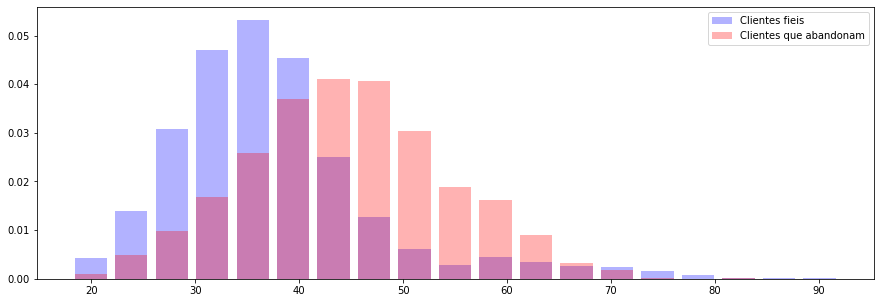

In [5]:
mi= X.Age.min()
ma= X.Age.max()
bins= np.linspace(mi, ma, 20)

plt.figure(figsize=(15, 5))
plt.hist(X.loc[y==0].Age, bins=bins, rwidth=.8, color='b', alpha=.3, density=True, label='Clientes fieis')
plt.hist(X.loc[y==1].Age, bins=bins, rwidth=.8, color='r', alpha=.3, density=True, label='Clientes que abandonam')
plt.legend()

### Podemos perceber que o público jovem, em sua maioria, tende a se manter fiel na empresa, enquanto o público a partir dos 40/45 anos é mais propenso a abandonar a empresa

In [6]:
y.mean()

0.2037

In [7]:
y.loc[X.Age>=40].mean()

0.3588337901819088

### Cerca de 36% dos clientes com mais de 40 anos abandonam a empresa

In [8]:
y.loc[X.Age<40].mean()

0.09971605144479706

### Apenas cerca de 10% dos clientes com menos de 40 anos abandonam a empresa

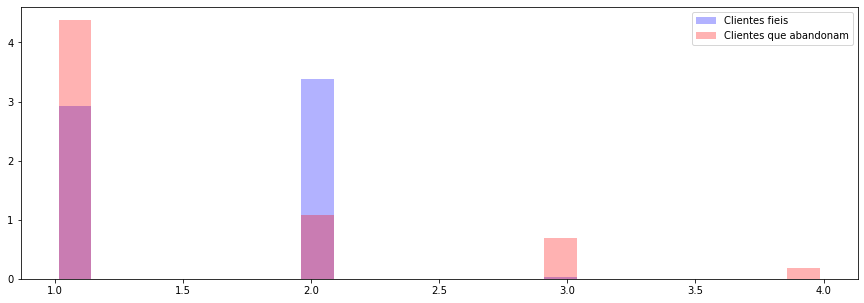

In [9]:
mi= X.NumOfProducts.min()
ma= X.NumOfProducts.max()
bins= np.linspace(mi, ma, 20)

plt.figure(figsize=(15, 5))
plt.hist(X.loc[y==0].NumOfProducts, bins=bins, rwidth=.8, color='b', alpha=.3, density=True, label='Clientes fieis')
plt.hist(X.loc[y==1].NumOfProducts, bins=bins, rwidth=.8, color='r', alpha=.3, density=True, label='Clientes que abandonam')
plt.legend()

### Estranhamente, clientes que possuem 2 produtos são mais prováveis a se manterem fieis. Enquanto isso, clientes com 3 ou 4 produtos, em sua maioria, abandonam a empresa. Isso pode ser devido aos planos oferecidos, a qualidade de outros produtos ou até uma coincidência.

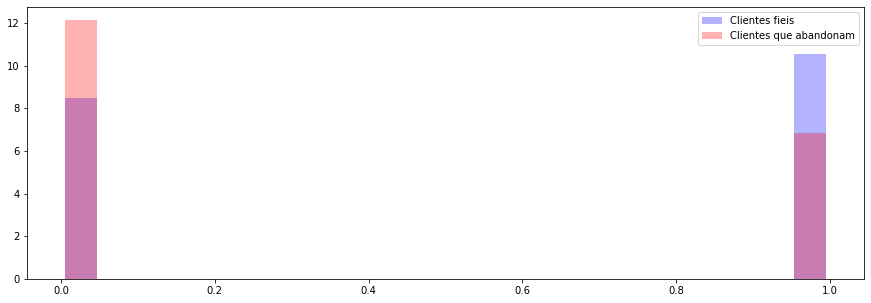

In [10]:
mi= X.IsActiveMember.min()
ma= X.IsActiveMember.max()
bins= np.linspace(mi, ma, 20)

plt.figure(figsize=(15, 5))
plt.hist(X.loc[y==0].IsActiveMember, bins= bins, rwidth=.8, color='b', alpha=.3, density=True, label='Clientes fieis')
plt.hist(X.loc[y==1].IsActiveMember, bins= bins, rwidth=.8, color='r', alpha=.3, density=True, label='Clientes que abandonam')
plt.legend()

### Clientes que são membros ativos, tendem a ser mais fieis, como esperado.

## Divisão em conjunto treino e conjunto teste

In [11]:
from sklearn.model_selection import train_test_split

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3, random_state=61658)

## Definição dos parâmetros de Validação Cruzada

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params={
    'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(
        DecisionTreeClassifier(random_state=61658), #1o arg - Modelo
        params,                                     #2o arg - Parâmetros
        cv= 10,                                     #3o arg - Qtd de folds
        scoring = 'roc_auc',                        #4o arg - Métrica
        verbose= 5                                  #5o arg - Mostra na tela
)

In [13]:
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             scoring='roc_auc', verbose=5)

## Encontrar o melhor modelo nos dados de treino por Validação Cruzada

In [14]:
grid.fit(X_tr, y_tr)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 2/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 3/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 4/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 5/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 6/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 7/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 8/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 9/10] END ..............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 10/10] END .............criterion=gini, max_leaf_nodes=4; total time=   0.0s
[CV 1/10] END ..............criterion=gini, max_leaf_nodes=8; total time=   0.0s
[CV 2/10] END ..............criterion=gini, ma

[CV 10/10] END ..........criterion=entropy, max_leaf_nodes=4; total time=   0.0s
[CV 1/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 2/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 3/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 4/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 5/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 6/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 7/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 8/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 9/10] END ...........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 10/10] END ..........criterion=entropy, max_leaf_nodes=8; total time=   0.0s
[CV 1/10] END ..........criterion=entropy, max_leaf_nodes=16; total time=   0.0s
[CV 2/10] END ..........crit

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [4, 8, 16, 32, 64, 128, 256, 512,
                                            1024, 2048]},
             scoring='roc_auc', verbose=5)

## Qual o melhor modelo?

In [15]:
grid.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 32}

   ### O melhor modelo encontrado na Validação Cruzada usou o critério de entropia e tem a quantidade máxima de folhas=32

## Qual foi o melhor score médio?

In [16]:
grid.best_score_

0.8275774006882053

## Vamos usar esse modelo no conjunto teste para validação

In [17]:
y_pred = grid.predict_proba(X_ts)[:, 1]
y_pred

array([0.07399577, 0.13777778, 0.03446502, ..., 0.13544018, 0.03446502,
       0.03446502])

## Curva ROC

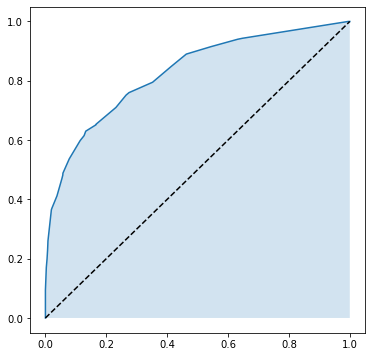

In [18]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_ts, y_pred)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.plot((0, 1), (0, 1), 'k--')
plt.fill_between(fpr, tpr, alpha=.2)

## ROC/AUC score

In [19]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_ts, y_pred)

0.8266989583333333

In [20]:
grid.best_score_

0.8275774006882053

### Números muito próximos é um bom indicador, isto quer dizer que o modelo está generalizando bem para os dados do conjunto teste

## Comparando o teste com treino

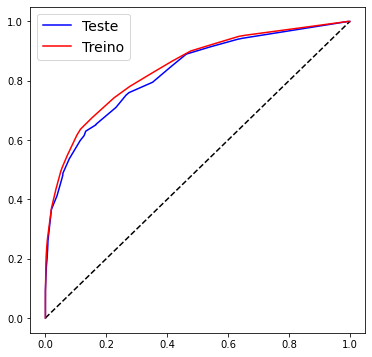

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, ths = roc_curve(y_ts, y_pred)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='Teste', color='b')
plt.plot((0, 1), (0, 1), 'k--')

fpr2, tpr2, ths2 = roc_curve(y_tr, grid.predict_proba(X_tr)[:, 1])
plt.plot(fpr2, tpr2, label='Treino', color='r')

plt.legend(fontsize=14)

### É normal o conjunto teste ter um score um pouco menor do que o conjunto treino! Diferenças entre as curvas até mostra que o modelo generalizou bem (sem overfit) para o conjunto teste.

## Visualizando a árvore

In [22]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=32,
                       random_state=61658)

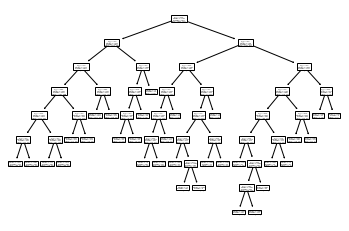

In [23]:
from sklearn.tree import plot_tree

plot_tree(grid.best_estimator_);

### Vendo o início da árvore (variáveis mais relevantes)

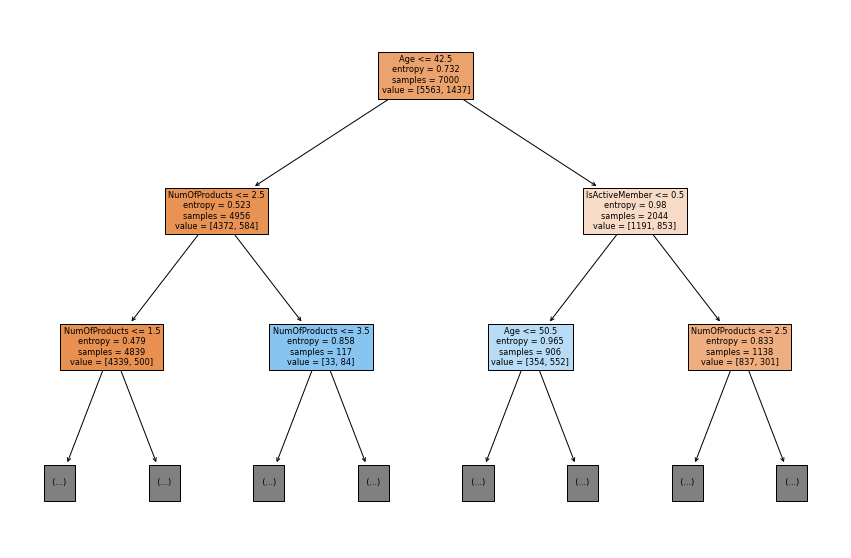

In [24]:
plt.figure(figsize=(15, 10))
plot_tree(grid.best_estimator_, max_depth=2,
         feature_names=X_tr.columns, filled=True);

### Podemos notar que o parâmetro que melhor divide os dados em clientes que são fieis e aqueles que abandonam é a idade = 42.5 anos, assim, este é o primeiro nó da árvore ou a raiz dela

## Adicionando uma coluna com as predições

In [25]:
df_itr = pd.concat([X_tr, y_tr], axis=1, join='inner')
df_itr

,Age,NumOfProducts,IsActiveMember,Exited
9057,33,2,1,0
81,32,1,0,1
3433,37,1,0,0
1768,28,2,0,0
1888,60,2,1,0
...,...,...,...,...
4368,33,1,0,0
9637,31,1,1,0
8675,54,1,0,0
8806,38,2,1,0


In [26]:
df_its = pd.concat([X_ts, y_ts], axis=1, join='inner')
df_its

,Age,NumOfProducts,IsActiveMember,Exited
2184,40,2,0,0
1795,35,1,1,0
2175,34,2,0,0
9004,33,2,0,0
3484,28,2,1,0
...,...,...,...,...
8441,23,2,0,0
9524,38,1,0,0
1685,20,1,0,1
5946,32,2,0,0


In [27]:
df_final = pd.concat([df_itr, df_its])
df_final

,Age,NumOfProducts,IsActiveMember,Exited
9057,33,2,1,0
81,32,1,0,1
3433,37,1,0,0
1768,28,2,0,0
1888,60,2,1,0
...,...,...,...,...
8441,23,2,0,0
9524,38,1,0,0
1685,20,1,0,1
5946,32,2,0,0


In [28]:
df_final['y_pred'] = grid.predict_proba(df_final.drop(columns='Exited'))[:, 1]
df_final

,Age,NumOfProducts,IsActiveMember,Exited,y_pred
9057,33,2,1,0,0.034465
81,32,1,0,1,0.135440
3433,37,1,0,0,0.193939
1768,28,2,0,0,0.034465
1888,60,2,1,0,0.126615
...,...,...,...,...,...
8441,23,2,0,0,0.034465
9524,38,1,0,0,0.193939
1685,20,1,0,1,0.135440
5946,32,2,0,0,0.034465


In [29]:
df_final.loc[df_final['y_pred'] <= 0.5, 'y_pred'] = 0
df_final.loc[df_final['y_pred'] > 0.5, 'y_pred'] = 1
df_final

,Age,NumOfProducts,IsActiveMember,Exited,y_pred
9057,33,2,1,0,0.0
81,32,1,0,1,0.0
3433,37,1,0,0,0.0
1768,28,2,0,0,0.0
1888,60,2,1,0,0.0
...,...,...,...,...,...
8441,23,2,0,0,0.0
9524,38,1,0,0,0.0
1685,20,1,0,1,0.0
5946,32,2,0,0,0.0
